In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.sample(5)

,Category,Message
3047,ham,So how's the weather over there?
1467,ham,Your account has been refilled successfully by...
247,ham,I asked you to call him now ok
4195,ham,Can not use foreign stamps in this country.
3000,ham,"Oh, then your phone phoned me but it disconnected"


In [4]:
df.shape

(5572, 2)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3.text preprocessing
# 4. model building
# 5. Evaluation
# 6.IMprovement
# 7.Website
# 8.Deploy

## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [8]:
df['Category'] = Encoder.fit_transform(df['Category'])

In [9]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
# And then check for Duplicate values
df.duplicated().sum()

np.int64(415)

In [12]:
#remove duplicates value
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(5157, 2)

## 2. EDA

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [17]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


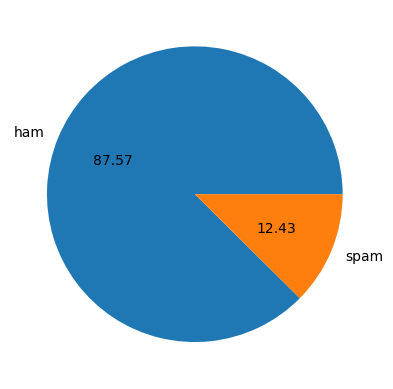

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# data is imbalanced

In [20]:
import nltk

In [21]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_targets'] = df['Message'].apply(len)

In [24]:
df.head()

,Category,Message,num_targets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df.head()

,Category,Message,num_targets,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Category,Message,num_targets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_targets','num_words','num_sentences']].describe()

,num_targets,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
 # ham 
df[df['Category'] == 0][['num_targets','num_words','num_sentences']].describe()

,num_targets,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam
df[df['Category'] == 1][['num_targets','num_words','num_sentences']].describe()

,num_targets,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
import seaborn as sns

In [34]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


<Axes: xlabel='num_targets', ylabel='Count'>

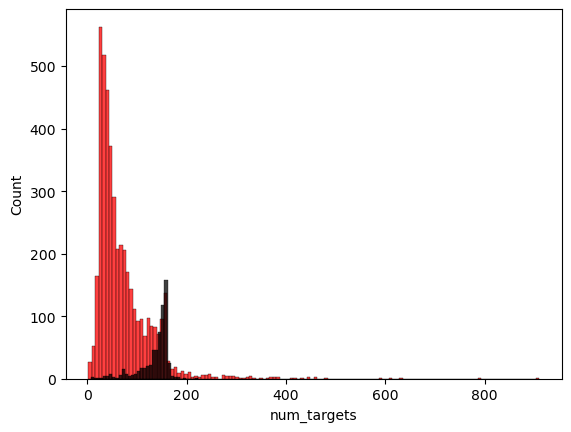

In [35]:
sns.histplot(df[df['Category'] ==0]['num_targets'],color='red')
sns.histplot(df[df['Category'] ==1]['num_targets'],color='black')

<Axes: xlabel='num_words', ylabel='Count'>

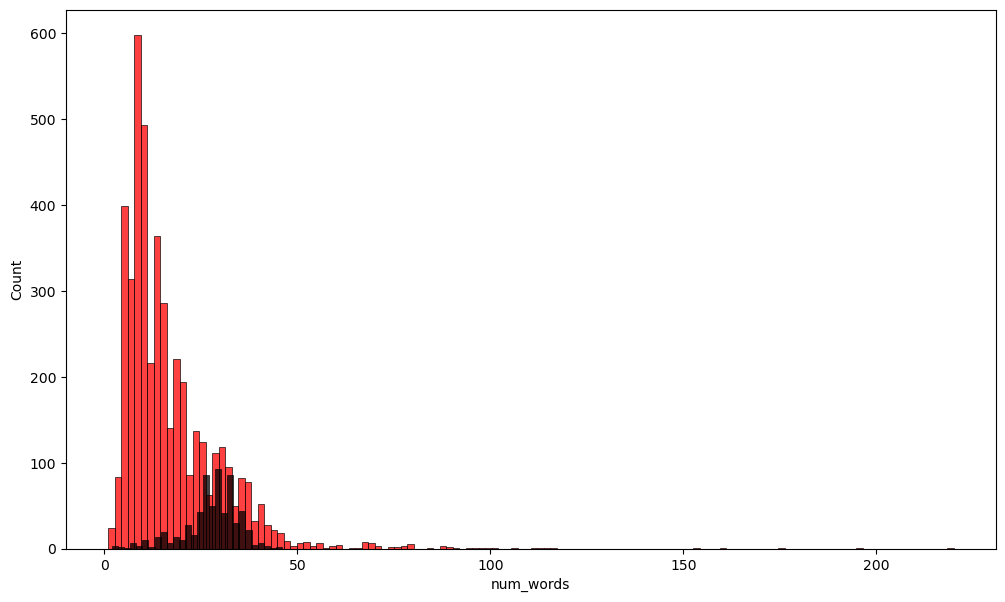

In [36]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['Category'] ==0]['num_words'],color='red')
sns.histplot(df[df['Category'] ==1]['num_words'],color='black')

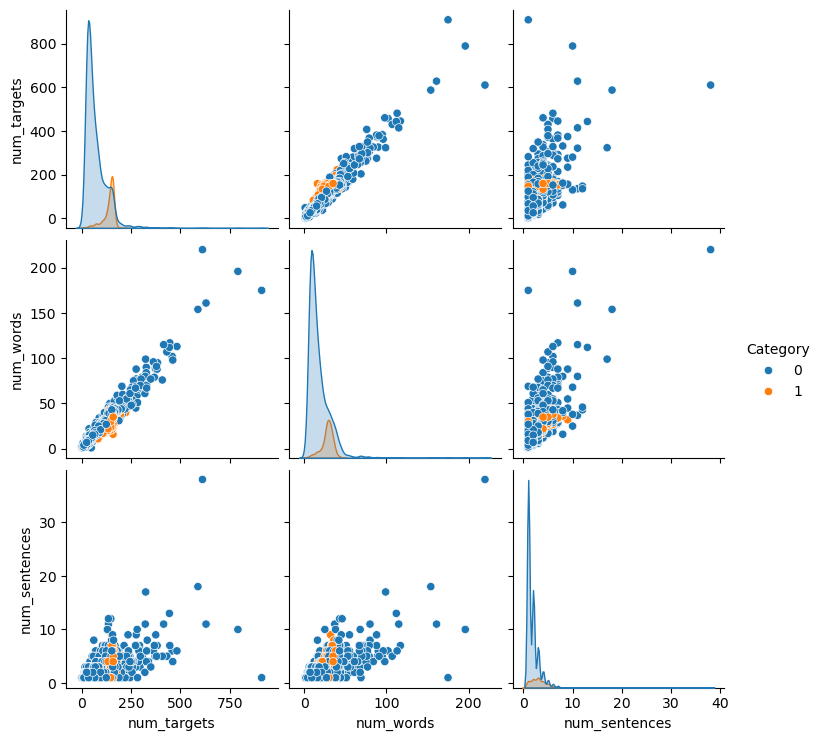

In [37]:
sns.pairplot(df,hue='Category')

In [38]:
pip install numpy --only-binary=:all:

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
!pip install pairplots

Defaulting to user installation because normal site-packages is not writeable
  Using cached pairplots-0.0.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [19 lines of output]
  + C:\ProgramData\anaconda3\python.exe C:\Users\WELCOME\AppData\Local\Temp\pip-install-wpjlg68w\numpy_76398de144c04a2b8ddd9bcc3a37a7b3\vendored-meson\meson\meson.py setup C:\Users\WELCOME\AppData\Local\Temp\pip-install-wpjlg68w\numpy_76398de144c04a2b8ddd9bcc3a37a7b3 C:\Users\WELCOME\AppData\Local\Temp\pip-install-wpjlg68w\numpy_76398de144c04a2b8ddd9bcc3a37a7b3\.mesonpy-uvolz8n8 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\WELCOME\AppData\Local\Temp\pip-install-wpjlg68w\numpy_76398de144c04a2b8ddd9bcc3a37a7b3\.mesonpy-uvolz8n8\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\WELCOME\AppData\Local\Temp\pip-install-wpjlg68w\numpy_76398de144c04a2b8ddd9bcc3a37a7b3
  Build dir: C:\Users\WELCOME\AppData\Local\Temp\pip-install-wpjlg68w\numpy_76398de144c04a2b8ddd9bcc3a37a7b

In [40]:
print(df.dtypes)

Category          int64
Message          object
num_targets       int64
num_words         int64
num_sentences     int64
dtype: object


<Axes: >

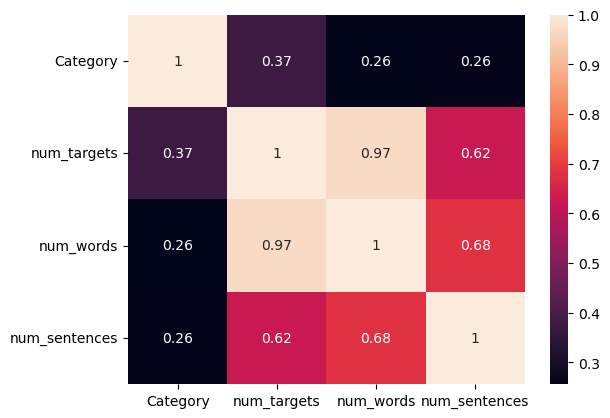

In [41]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

## 3.Data preprocessing
   . Lower case
   . Tokenization
   . Removing special character
   . Removing stop words and punctuation

In [42]:
from  nltk.corpus import stopwords
stopwords.words('English')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
def transform_Message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    
    Message = y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Message = y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def transform_Message(Message):
    ps = PorterStemmer()
    Message = word_tokenize(Message)
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    return " ".join([ps.stem(i) for i in y])

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [48]:
df['Message'][100]

"Please don't text me anymore. I have nothing else to say."

In [49]:
transform_Message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [50]:
print(df.columns)

Index(['Category', 'Message', 'num_targets', 'num_words', 'num_sentences'], dtype='object')


In [51]:
df['transformed_Message'] = df['Message'].apply(transform_Message)


In [52]:
old_columns = df.columns.tolist()
print(old_columns)

['Category', 'Message', 'num_targets', 'num_words', 'num_sentences', 'transformed_Message']


In [53]:
df.head()

,Category,Message,num_targets,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [54]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['Category']==1]['transformed_Message'].str.cat(sep=" "))

<Figure size 1600x600 with 0 Axes>

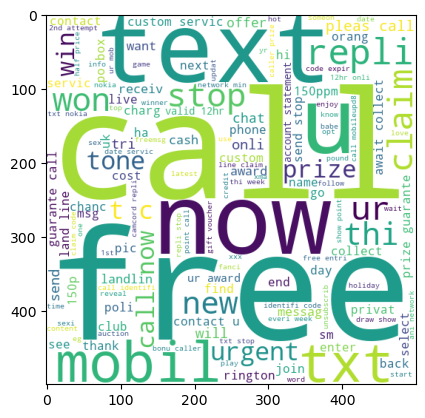

<Figure size 1600x600 with 0 Axes>

In [57]:
plt.imshow(spam_wc)
plt.figure(figsize=(16,6))


In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
ham_wc = wc.generate(df[df['Category']==0]['transformed_Message'].str.cat(sep=" "))

<Figure size 1600x600 with 0 Axes>

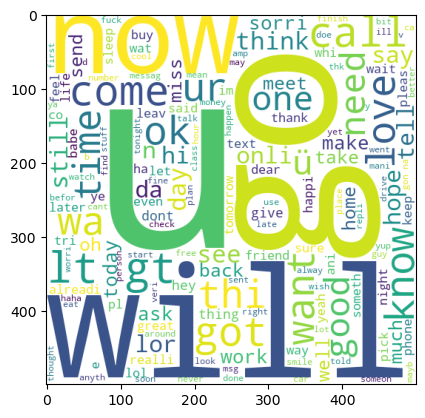

<Figure size 1600x600 with 0 Axes>

In [60]:
plt.imshow(ham_wc)
plt.figure(figsize=(16,6))

In [61]:
df.head()

,Category,Message,num_targets,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [62]:
!pip install counter

Defaulting to user installation because normal site-packages is not writeable


In [63]:
spam_corpus = []
for sent in df[df['Category'] == 1]['transformed_Message'].tolist():
    for word in sent.split():
        spam_corpus.append(word)

In [64]:
len(spam_corpus)

14296

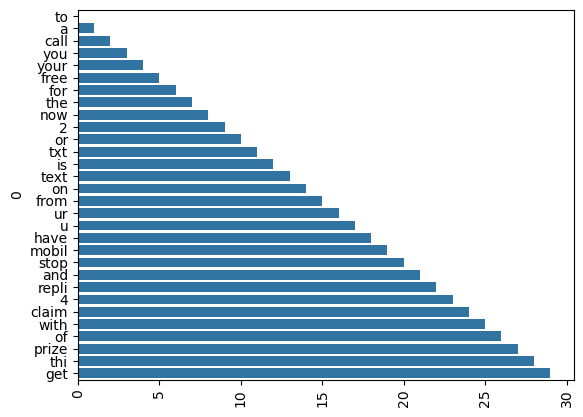

In [65]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
ham_corpus = []
for sent in df[df['Category'] == 0]['transformed_Message'].tolist():
    for word in sent.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

63680

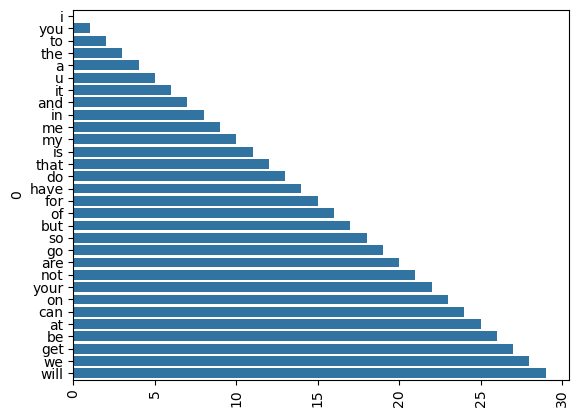

In [68]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
CV = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = tfidf.fit_transform(df['transformed_Message']).toarray()

In [71]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [72]:
# appending the num_character col to X
#X = np.hstack((X,df['num_targets'].values.reshape(-1,1)))

In [73]:
X.shape

(5157, 3000)

In [74]:
y = df['Category'].values

In [75]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.875968992248062
[[795 110]
 [ 18 109]]
0.4977168949771689


In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9699612403100775
[[905   0]
 [ 31  96]]
1.0


In [83]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [84]:
## tfidf - mnb
## i choose mnb bea precision is correct 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9636363636363636)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9636363636363636
For  KN
Accuracy -  0.9137596899224806
Precision -  1.0
For  NB
Accuracy -  0.9699612403100775
Precision -  1.0
For  DT
Accuracy -  0.9408914728682171
Precision -  0.9342105263157895
For  LR
Accuracy -  0.9573643410852714
Precision -  0.9029126213592233
For  RF
Accuracy -  0.9680232558139535
Precision -  1.0
For  AdaBoost
Accuracy -  0.939922480620155
Precision -  0.8823529411764706
For  BgC
Accuracy -  0.9709302325581395
Precision -  0.9619047619047619
For  ETC
Accuracy -  0.9757751937984496
Precision -  1.0
For  GBDT
Accuracy -  0.9554263565891473
Precision -  1.0
For  xgb
Accuracy -  0.9718992248062015
Precision -  0.9711538461538461


In [92]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [93]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.913760,1.000000
2,NB,0.969961,1.000000
5,RF,0.968023,1.000000
9,GBDT,0.955426,1.000000
8,ETC,0.975775,1.000000
10,xgb,0.971899,0.971154
0,SVC,0.975775,0.963636
7,BgC,0.970930,0.961905
3,DT,0.940891,0.934211
4,LR,0.957364,0.902913


In [94]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [95]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.913760
1,NB,Accuracy,0.969961
2,RF,Accuracy,0.968023
3,GBDT,Accuracy,0.955426
4,ETC,Accuracy,0.975775
5,xgb,Accuracy,0.971899
6,SVC,Accuracy,0.975775
7,BgC,Accuracy,0.970930
8,DT,Accuracy,0.940891
9,LR,Accuracy,0.957364


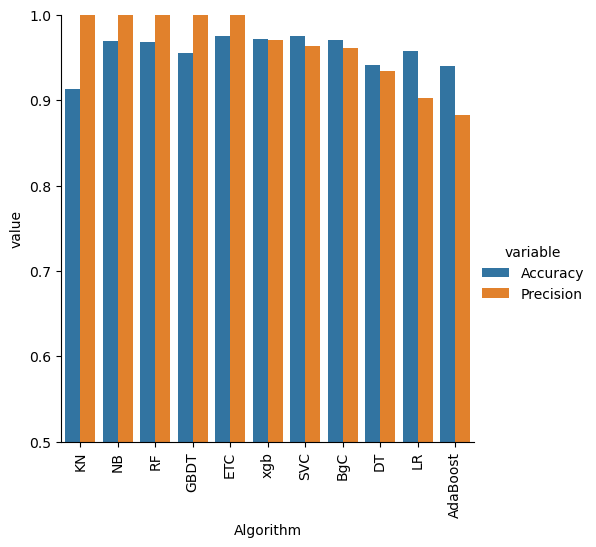

In [96]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [97]:
# model improve
# 1. chage the max_features parameter of TfIdf

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [100]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [101]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [103]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.913760,1.000000,0.913760,1.000000,0.913760,1.000000,0.913760,1.000000
1,NB,0.969961,1.000000,0.969961,1.000000,0.969961,1.000000,0.969961,1.000000
2,RF,0.968023,1.000000,0.968023,1.000000,0.968023,1.000000,0.968023,1.000000
3,GBDT,0.955426,1.000000,0.955426,1.000000,0.955426,1.000000,0.955426,1.000000
4,ETC,0.975775,1.000000,0.975775,1.000000,0.975775,1.000000,0.975775,1.000000
5,xgb,0.971899,0.971154,0.971899,0.971154,0.971899,0.971154,0.971899,0.971154
6,SVC,0.975775,0.963636,0.975775,0.963636,0.975775,0.963636,0.975775,0.963636
7,BgC,0.970930,0.961905,0.970930,0.961905,0.970930,0.961905,0.970930,0.961905
8,DT,0.940891,0.934211,0.940891,0.934211,0.940891,0.934211,0.940891,0.934211
9,LR,0.957364,0.902913,0.957364,0.902913,0.957364,0.902913,0.957364,0.902913


In [104]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [105]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [106]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [107]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835271317829457
Precision 1.0


In [108]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [109]:
from sklearn.ensemble import StackingClassifier

In [110]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [111]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9844961240310077
Precision 0.9743589743589743


In [115]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))